In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
np.random.seed(2000)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

class Matrix:
    def __init__(self, cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Oranges):
        self.cm = cm
        self.classes = classes
        self.normalize = normalize
        self.title = title
        self.cmap = cmap
    
    def plot_confusion_matrix(self):
        """
        This function prints and plots the confusion matrix.
        """
        cm = self.cm
        if self.normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        plt.figure(figsize=(5, 5))
        plt.imshow(cm, interpolation='nearest', cmap=self.cmap)
        plt.title(self.title, size=24)
        plt.colorbar(aspect=4)
        tick_marks = np.arange(len(self.classes))
        plt.xticks(tick_marks, self.classes, rotation=45, size=14)
        plt.yticks(tick_marks, self.classes, size=14)

        fmt = '.2f' if self.normalize else 'd'
        thresh = cm.max() / 2.

        # Labeling the plot
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt), fontsize=20,
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label', size=18)
        plt.xlabel('Predicted label', size=18)


# Titanic Dataset

https://www.kaggle.com/competitions/titanic/data

In [14]:
train = pd.read_csv("/Machine_Learning/Hand_On_ML/titanic_dataset/train.csv", index_col = 0)
test = pd.read_csv("/Machine_Learning/Hand_On_ML/titanic_dataset/test.csv", index_col = 0)

# Exploratory data Analysis

In [15]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
# Rate of missing values.
train.isnull().sum()/train.shape[0]

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

In [24]:
# Let's drop the column Cabin (too much missing values)
train.drop('Cabin', axis= 1, inplace = True)

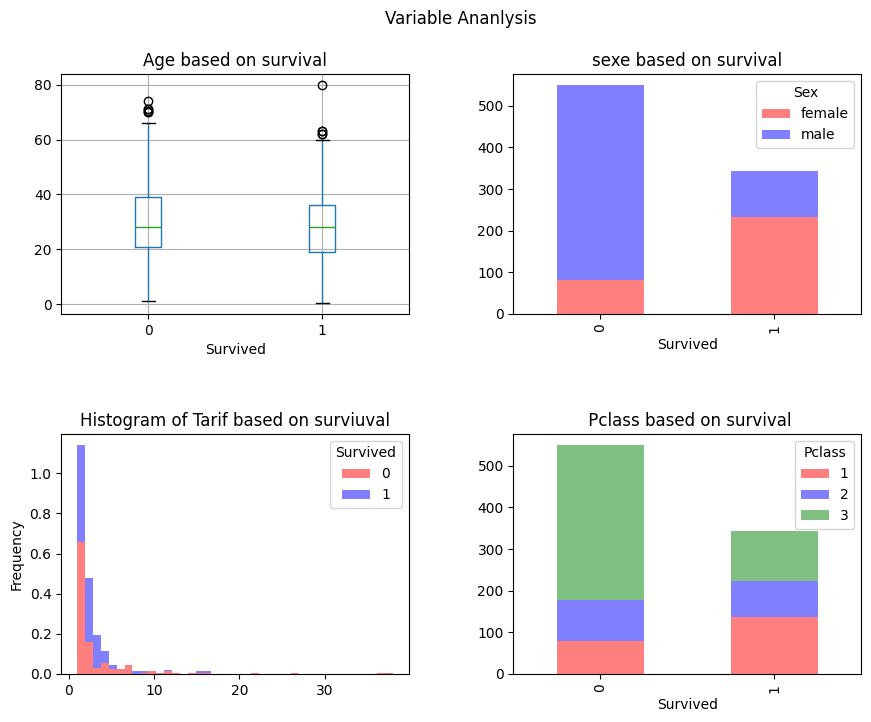

In [30]:
# Display a figure

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

#Box plot of age with respect to survival.
train.boxplot(column='Age', by='Survived', ax=axs[0,0] )
axs[0,0].set_title('Age based on survival')
#Box plot of sex with respect to survival.
train.groupby(['Survived', 'Sex'])['Survived'].count().unstack().plot(kind='bar', stacked=True, color=['red', 'blue'],alpha = 0.5, ax =axs[0,1]) 
axs[0,1].set_title("sexe based on survival")

# Histogram tarif by survival
train.groupby(['Fare', 'Survived'])['Fare'].count().unstack().plot(kind='hist', alpha =0.5, bins= 40, color= ['red', 'blue'], stacked =True, ax= axs[1,0], density=True)
axs[1,0].set_title("Histogram of Tarif based on surviuval")
##Box plot of survival by class.
train.groupby(['Survived', 'Pclass'])['Survived'].count().unstack().plot(kind='bar', stacked=True, color= ['red', 'blue', 'green'], alpha=0.5, ax=axs[1,1])
axs[1,1].set_title(" Pclass based on survival")

# Ajust space between the figures
plt.subplots_adjust(hspace=0.5, wspace=0.3)

fig.suptitle("Variable Ananlysis")
plt.show()

The charts indicate that survival on the Titanic was strongly influenced by gender and passenger class. Women had a much higher survival rate than men, and first-class passengers were more likely to survive compared to those in second and third class. Although most passengers paid lower fares, there is no clear correlation between fare and survival. Age does not appear to be a decisive factor either, as both survivors and non-survivors had a similar age distribution with a median around 30 years. Overall, gender and class played the most significant roles in determining survival.

In [ ]:
cov = train.cov()

for i in range(cov.shape[0]):
    cov.iloc[i,i] = 0